# Robot Learning Visualizations

#### Basic Setup

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Change some settings for better aesthetics
mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

# Enable high-definition inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # or 'svg' for vector


# Optional: better style
sns.set(style="darkgrid")


#### Load Evaluation Log

In [58]:
#df = pd.read_csv("eval_logs/eval_log.csv")
#df = pd.read_csv("eval_logs/PPO_10deg_rand_force.csv")
#df = pd.read_csv("eval_logs/PPO_10deg_rand_force_4.csv")
df = pd.read_csv("eval_logs/PPO_10deg_rand_force_4_0force.csv")
print("Data loaded:", df.shape)
df.head()


Data loaded: (512, 23)


,step,reward,x,y,z,x_angle,y_angle,z_angle,wheel_speed_l,wheel_speed_r,...,action_1,reward_survive,distance_penalty,y_angle_penalty,z_angle_penalty,wheel_l_penalty,wheel_r_penalty,y_angle_vel_penalty,x_vel_penalty,TimeLimit.truncated
0,0,0.802647,-0.000074,1.852932e-07,0.627066,-0.000093,9.977974,-0.000212,0.000000,0.000000,...,-5.008578,1,-0.000055,-0.197293,-0.000004,-0.000000,-0.000000,-0.000000,-0.000000,False
1,1,0.598911,-0.000036,6.852361e-06,0.626981,0.000324,9.813412,0.006812,2.030830,-2.159821,...,-5.009655,1,-0.000027,-0.197063,-0.000128,-0.093631,-0.098591,-0.001873,-0.009776,False
2,2,0.539316,0.000031,2.511493e-05,0.626934,0.001550,9.530882,0.027403,2.617573,-2.827022,...,-5.867865,1,-0.000023,-0.196621,-0.000514,-0.114924,-0.121728,-0.004564,-0.022311,False
3,3,0.468419,0.000162,6.118503e-05,0.627222,0.002788,9.127528,0.059752,3.771674,-4.044123,...,-5.909895,1,-0.000121,-0.195874,-0.001120,-0.147312,-0.153238,-0.007243,-0.026674,False
4,4,0.419539,0.000334,1.577962e-04,0.627777,-0.000367,8.603406,0.111622,5.049368,-5.405708,...,-5.865390,1,-0.000251,-0.194654,-0.002088,-0.170342,-0.174878,-0.009617,-0.028631,False


#### Reward per Step

Text(0.5, 0, 'Step')

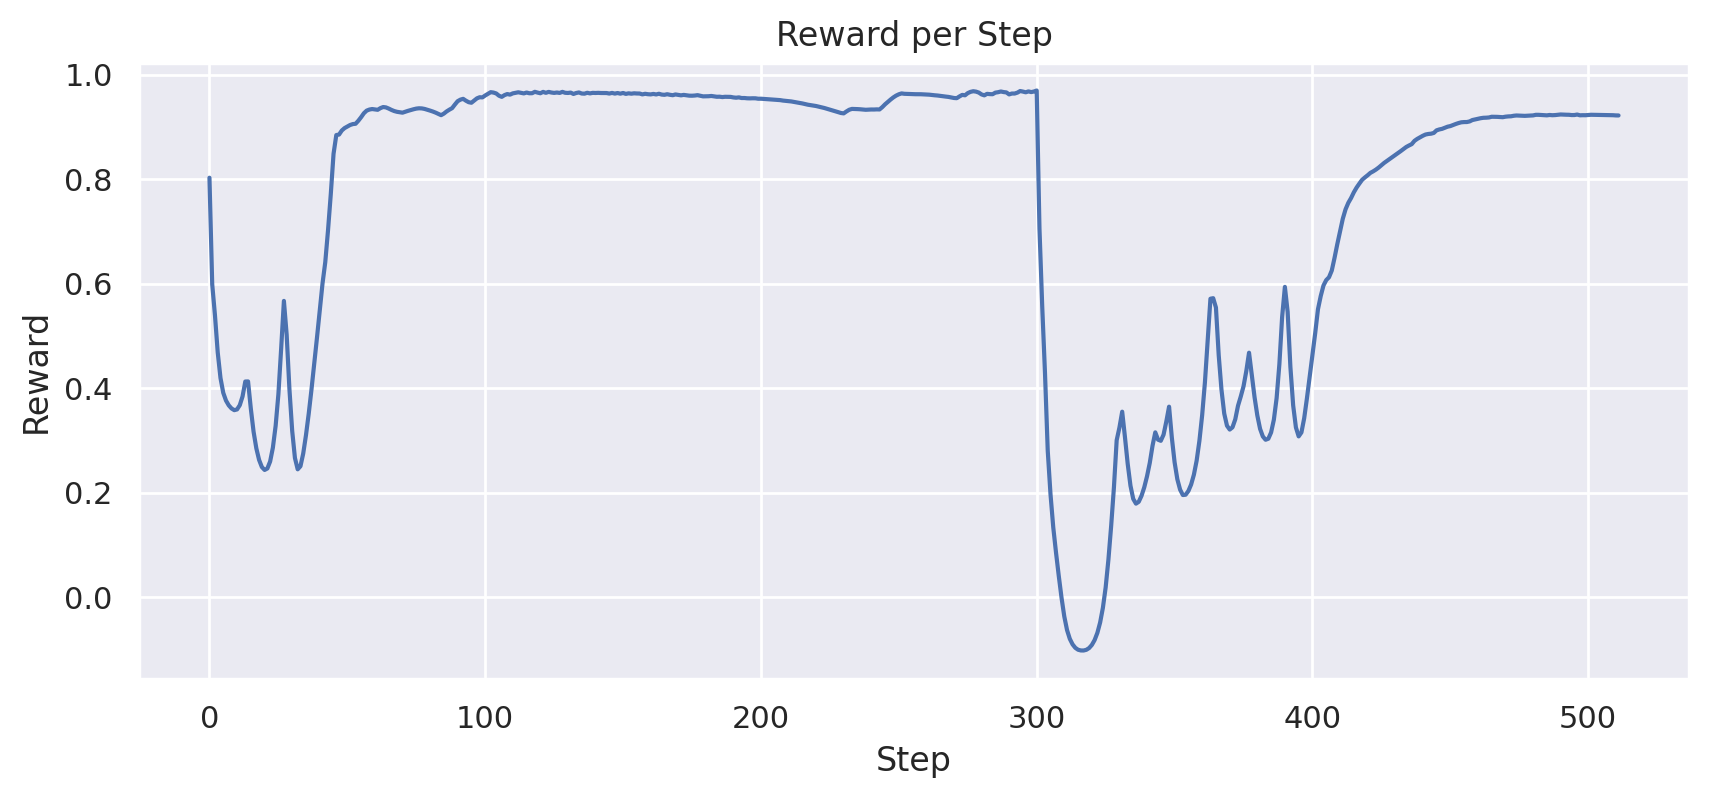

In [59]:
df.groupby("step")["reward"].sum().plot(title="Reward per Step", figsize=(10, 4))
plt.ylabel("Reward")
plt.xlabel("Step")


#### Physical Parameters over Tine (in one Plot)

In [60]:
# fig, ax = plt.subplots(figsize=(10, 5))
# df["x"].plot(label="x position", ax=ax)
# df["x_vel"].plot(label="x velocity", ax=ax)
# df["y_angle"].plot(label="y angle", ax=ax)
# plt.title("Selected Observations over Time")
# plt.xlabel("Step")
# plt.legend()


#### Physical Parameters over Tine (in seperate Plots)

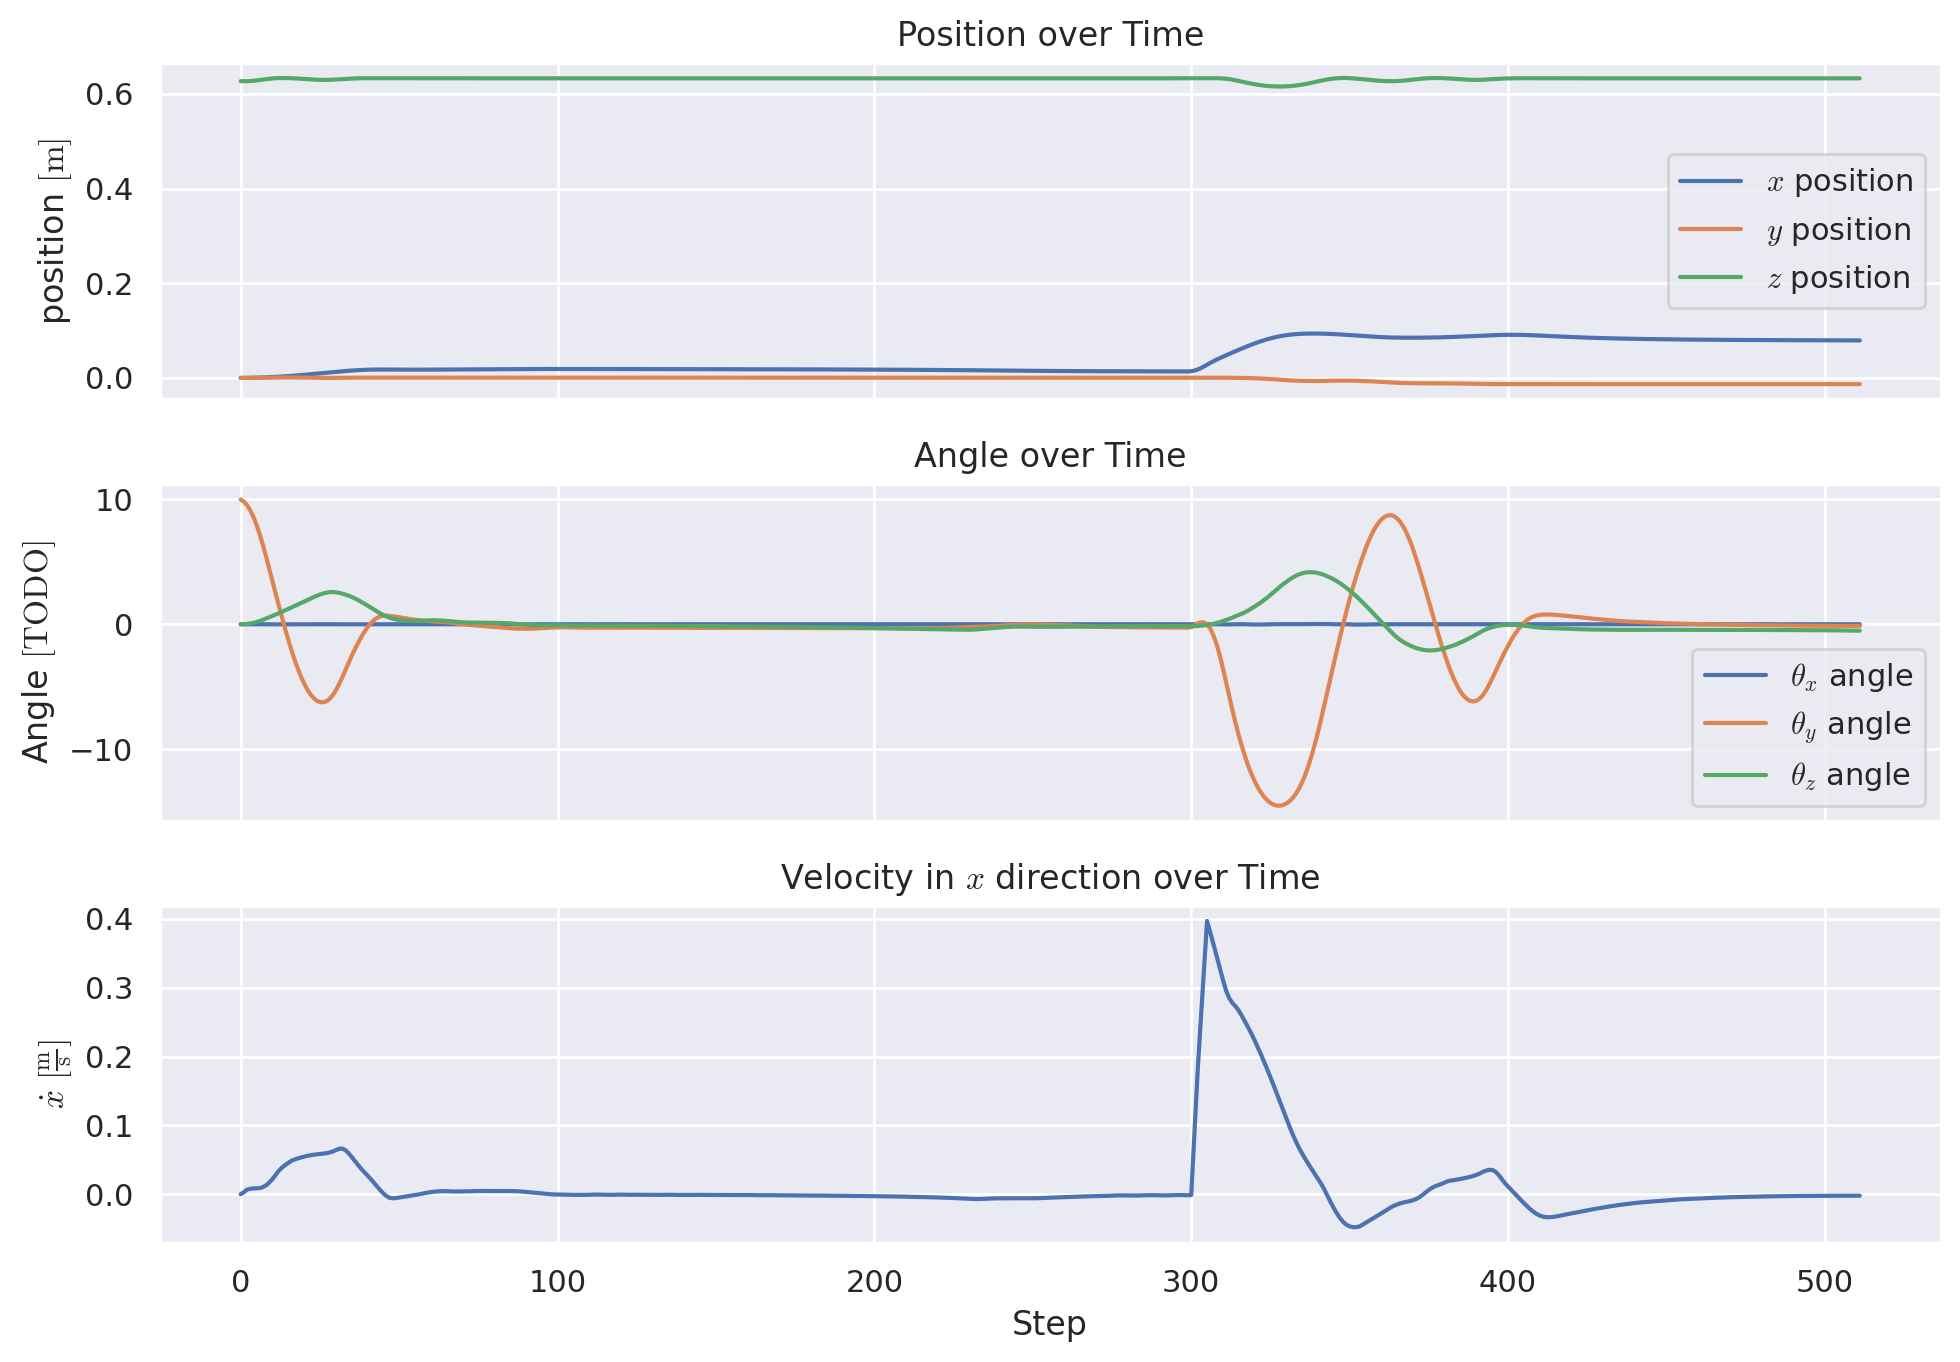

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

# Postitions
df["x"].plot(ax=axes[0], label=r"$x$ position")
axes[0].legend()
df["y"].plot(ax=axes[0], label=r"$y$ position")
axes[0].legend()
df["z"].plot(ax=axes[0], label=r"$z$ position")

axes[0].legend()
axes[0].set_title(r"Position over Time")
axes[0].set_ylabel(r"position $\mathrm{[m]}$")

# Angles
df["x_angle"].plot(ax=axes[1], label=r"$\theta_x$ angle")
axes[1].legend()
df["y_angle"].plot(ax=axes[1], label=r"$\theta_y$ angle")
axes[1].legend()
df["z_angle"].plot(ax=axes[1], label=r"$\theta_z$ angle")
axes[1].legend()

axes[1].set_title(r"Angle over Time")
axes[1].set_ylabel(r"Angle $\mathrm{[TODO]}$")

# Velocities
df["x_vel"].plot(ax=axes[2], label=r"$x$ velocity")
axes[1].legend()
# y_vel isnt extracted and saved yet!
# df["y_vel"].plot(ax=axes[2], label="y velocity")
# axes[1].legend()
# z_vel isnt extracted and saved yet!
# df["z_vel"].plot(ax=axes[2], label="z velocity")
# axes[1].legend()

axes[2].set_title(r"Velocity in $x$ direction over Time")
axes[2].set_ylabel(r"$\dot{x}$ $[\frac{\mathrm{m}}{\mathrm{s}}]$")
axes[2].set_xlabel("Step")


plt.tight_layout()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

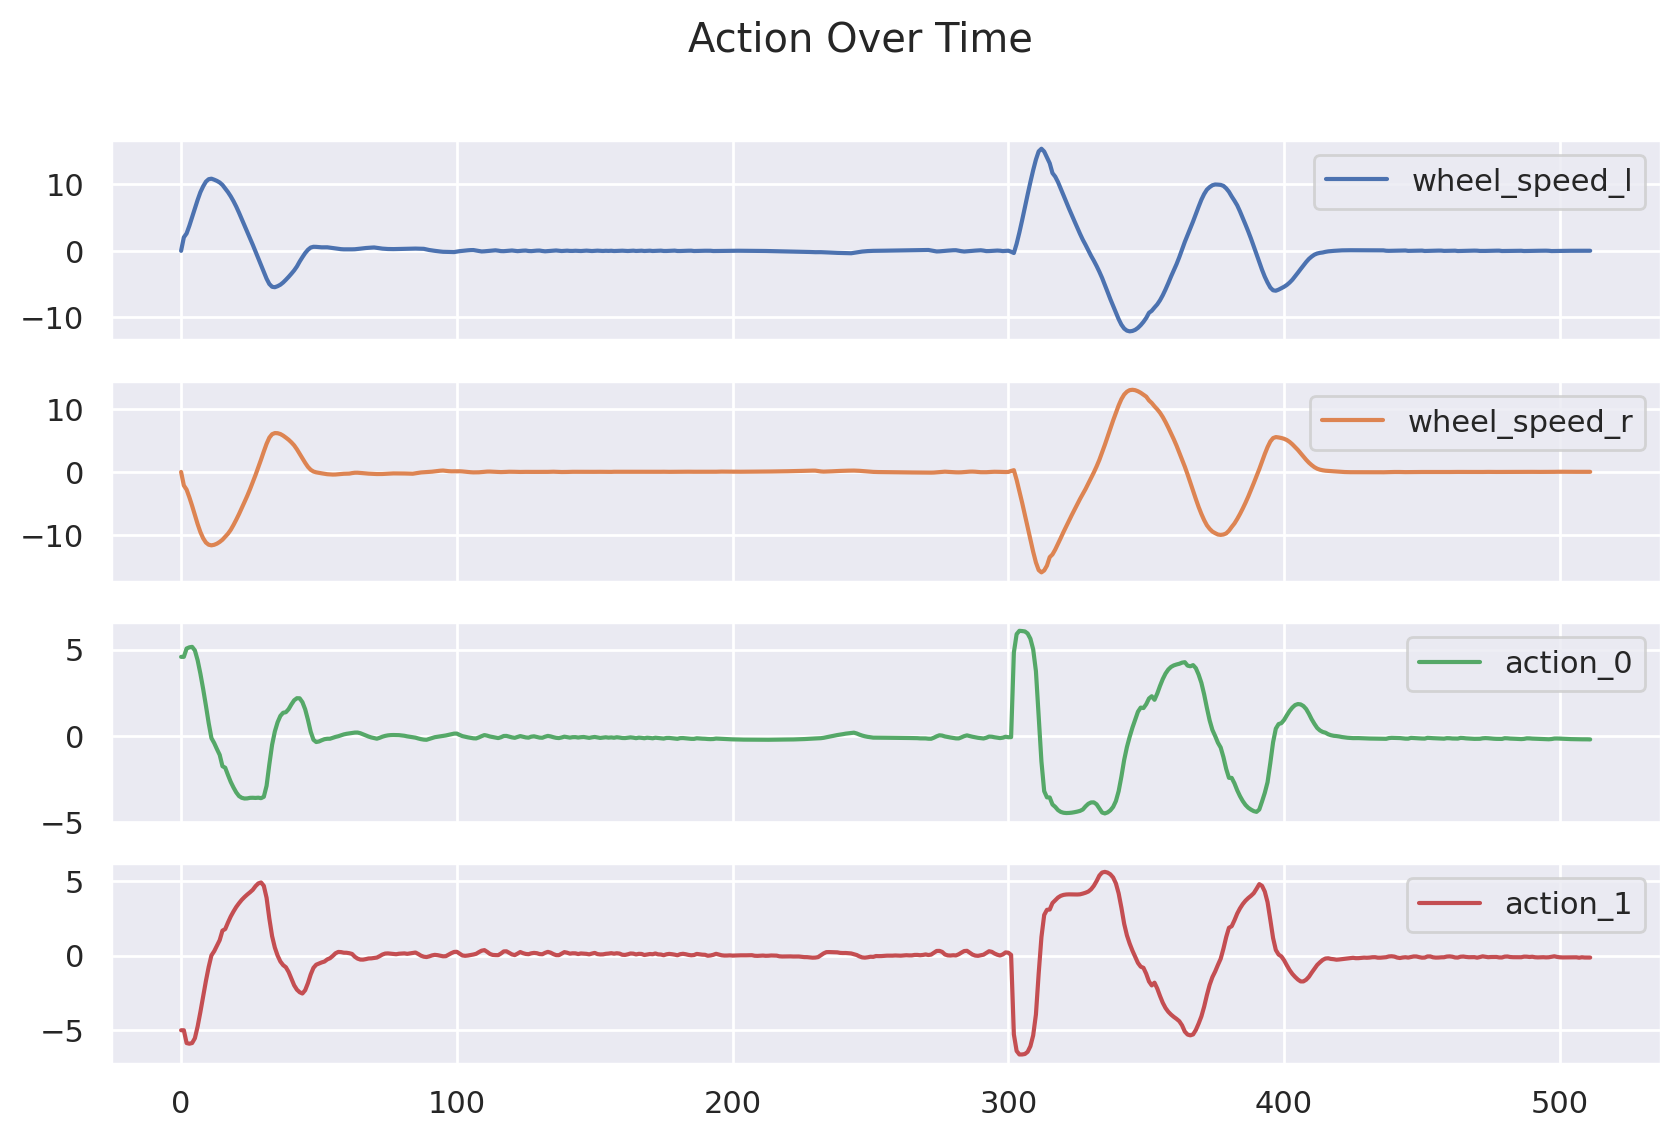

In [62]:
action_cols = [col for col in df.columns if "action" in col or "wheel_speed" in col]
df[action_cols].plot(subplots=True, figsize=(10, 6), title="Action Over Time")


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

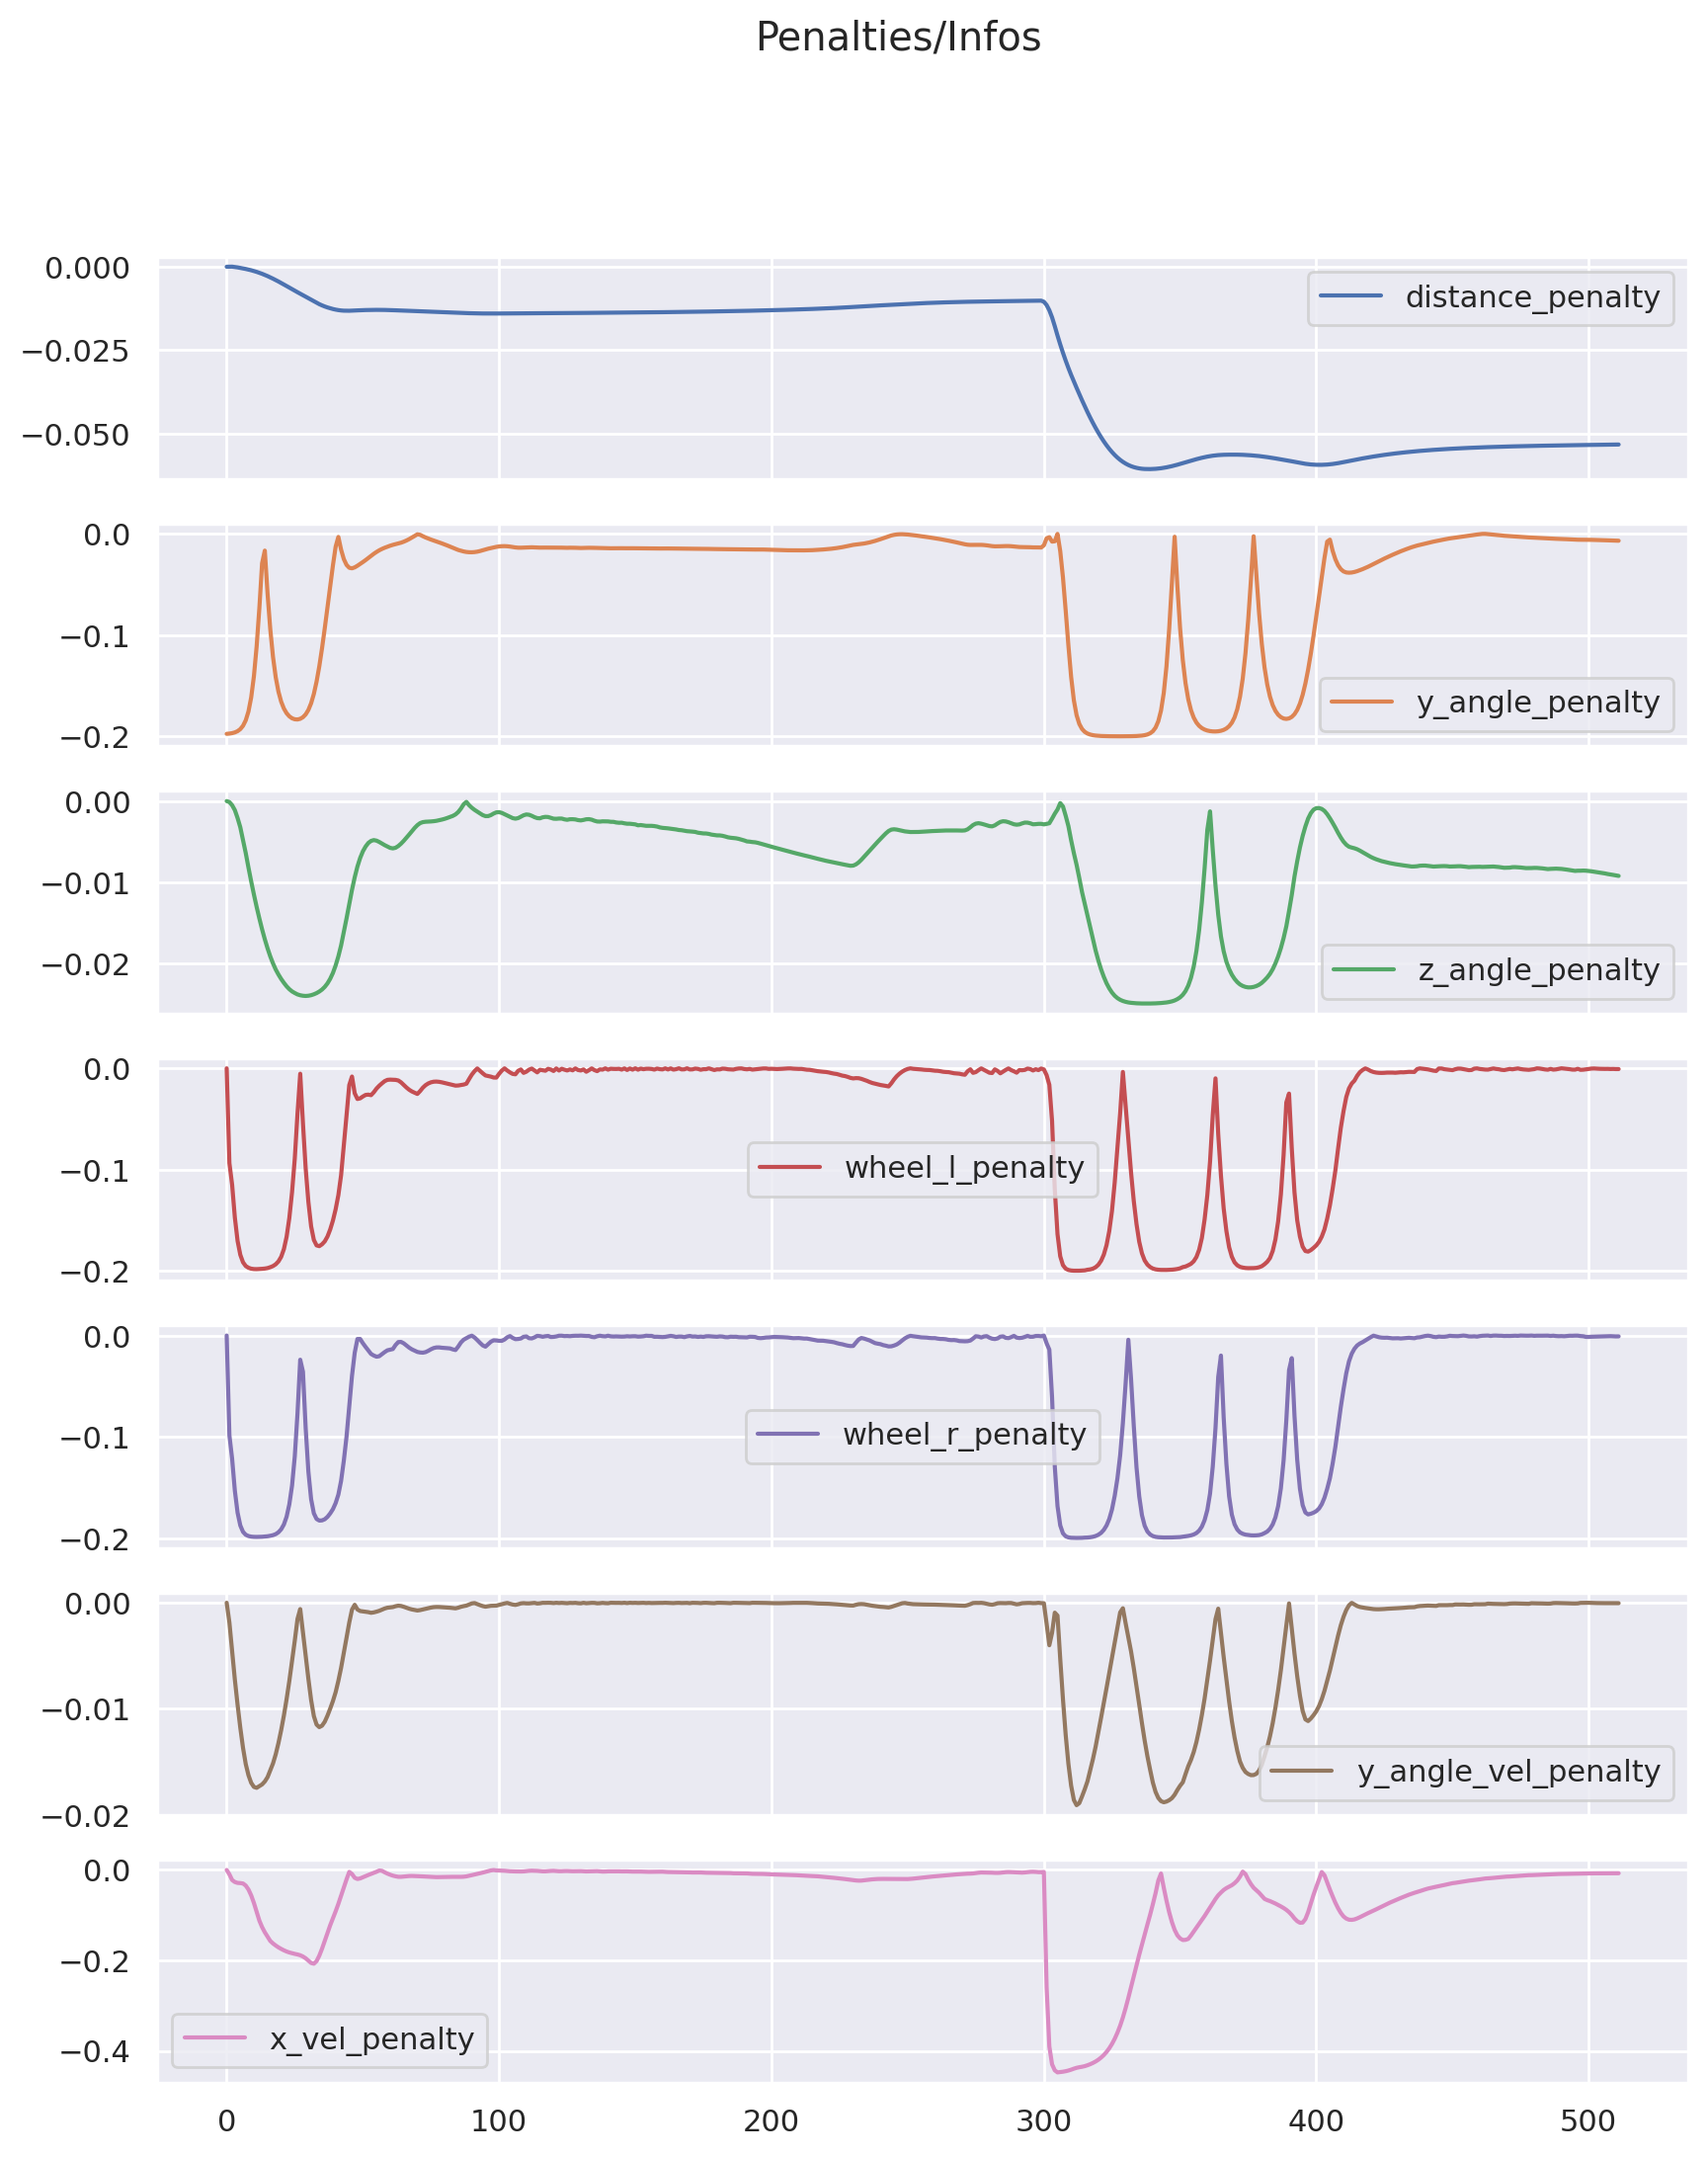

In [63]:
info_cols = [col for col in df.columns if "penalty" in col or "info_" in col]
df[info_cols].plot(subplots=True, figsize=(10, 12), title="Penalties/Infos")